In [ ]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
from helper import TelecomHelper
import plots


In [4]:
pd.set_option('max_column', None)
pd.options.display.float_format = "{:.6f}".format

In [5]:
CSV_PATH = "../data/cleaned_data.csv"

In [6]:
TelecomHelper = TelecomHelper()

In [7]:
df = TelecomHelper.read_csv(csv_path=CSV_PATH)

file read as csv


In [8]:
print(f"The percentage of data missing is: {TelecomHelper.percent_missing(df)}")

The percentage of data missing is: 0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       146891 non-null  float64
 1   start                           146891 non-null  object 
 2   start_ms                        146891 non-null  float64
 3   end                             146891 non-null  object 
 4   end_ms                          146891 non-null  float64
 5   dur._(ms)                       146891 non-null  float64
 6   imsi                            146891 non-null  float64
 7   msisdn/number                   146891 non-null  float64
 8   imei                            146891 non-null  float64
 9   last_location_name              146891 non-null  object 
 10  avg_rtt_dl_(ms)                 146891 non-null  float64
 11  avg_rtt_ul_(ms)                 146891 non-null  float64
 12  avg_bearer_tp_dl

In [10]:
renamed_df = df.rename(columns={'msisdn/number': 'msisdn', 'dur._(ms)': 'duration' })

In [11]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       146891 non-null  float64
 1   start                           146891 non-null  object 
 2   start_ms                        146891 non-null  float64
 3   end                             146891 non-null  object 
 4   end_ms                          146891 non-null  float64
 5   duration                        146891 non-null  float64
 6   imsi                            146891 non-null  float64
 7   msisdn                          146891 non-null  float64
 8   imei                            146891 non-null  float64
 9   last_location_name              146891 non-null  object 
 10  avg_rtt_dl_(ms)                 146891 non-null  float64
 11  avg_rtt_ul_(ms)                 146891 non-null  float64
 12  avg_bearer_tp_dl

In [12]:
agg_by_session_count = renamed_df.groupby('msisdn').agg({'bearer_id': 'count'})
session_freq_metrics = agg_by_session_count.sort_values(by=['bearer_id'], ascending = False)
session_freq_metrics.head(10)

,bearer_id
msisdn,
33626320676.000000,18
33614892860.000000,17
33625779332.000000,17
33659725664.000000,16
33675877202.000000,15
33760536639.000000,15
33667163239.000000,13
33603127838.000000,12
33760413819.000000,12


In [13]:
agg_by_duration = renamed_df.groupby('msisdn').agg({'duration': 'sum'})
duration_metrics = agg_by_duration.sort_values(by=['duration'], ascending = False)
duration_metrics.head(10)

,duration
msisdn,
33625779332.000000,18553754.000000
33614892860.000000,9966898.000000
33760536639.000000,9279434.000000
33626320676.000000,8791927.000000
33667163239.000000,8744914.000000
33664693736.000000,6288730.000000
33603127838.000000,6287761.000000
33667456716.000000,5649882.000000
33760413819.000000,5321667.000000


In [14]:
agg_by_data = renamed_df.groupby('msisdn').agg({'total_data': 'sum'})
traffic_metric = agg_by_data.sort_values(by=['total_data'], ascending = False)
traffic_metric.head(10)

,total_data
msisdn,
33614892860.000000,8846226494.000000
33760536639.000000,8514773963.000000
33625779332.000000,8499620722.000000
33626320676.000000,7971167261.000000
33675877202.000000,7891110608.000000
33659725664.000000,7705862783.000000
33666464084.000000,7308500938.000000
33760413819.000000,7132370514.000000
33664712899.000000,6872018208.000000


In [115]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans


def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)
    

In [51]:
engagment_metrics = renamed_df.groupby('msisdn').agg({'bearer_id': 'count','duration': 'sum', 'total_data': 'sum',})
engagment_metrics.sort_values(by=['bearer_id'], ascending=False).head(10)

,bearer_id,duration,total_data
msisdn,,,
33626320676.000000,18,8791927.000000,7971167261.000000
33614892860.000000,17,9966898.000000,8846226494.000000
33625779332.000000,17,18553754.000000,8499620722.000000
33659725664.000000,16,4035428.000000,7705862783.000000
33675877202.000000,15,4865947.000000,7891110608.000000
33760536639.000000,15,9279434.000000,8514773963.000000
33667163239.000000,13,8744914.000000,5618394054.000000
33603127838.000000,12,6287761.000000,4976195043.000000
33760413819.000000,12,5321667.000000,7132370514.000000


In [83]:
engagment_metrics.describe()


,bearer_id,duration,total_data
count,105719.000000,105719.000000,105719.000000
mean,1.389447,146211.393988,688866059.424815
std,0.796173,184539.076531,486996435.345276
min,1.000000,7142.000000,33249009.000000
25%,1.000000,72729.000000,357950085.000000
50%,1.000000,103111.000000,616933544.000000
75%,2.000000,172799.000000,856473809.500000
max,18.000000,18553754.000000,8846226494.000000


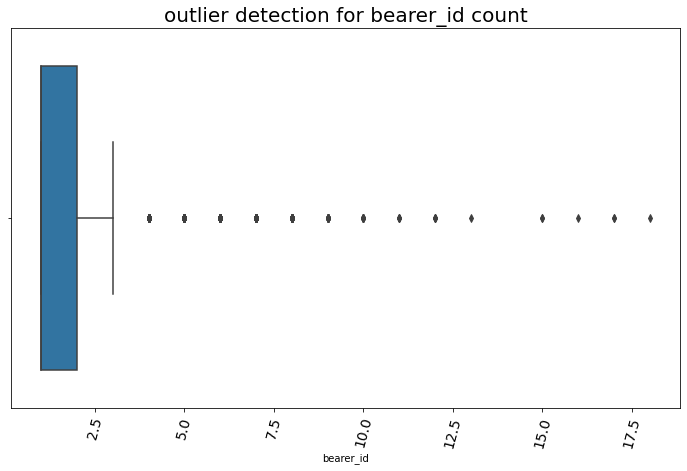

In [76]:
plots.plot_box(engagment_metrics, 'bearer_id', 'outlier detection for bearer_id count')

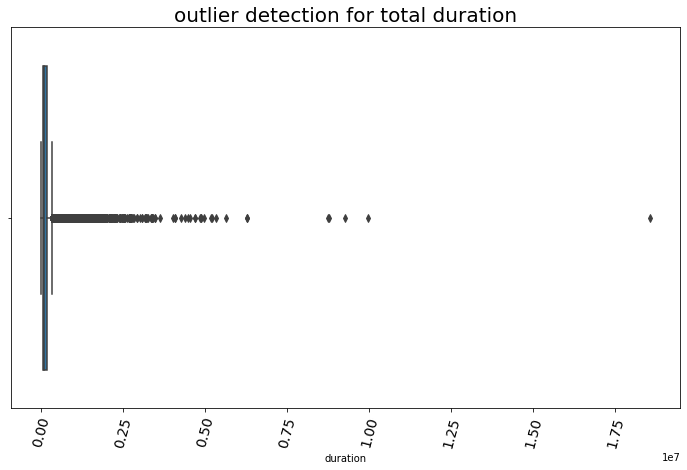

In [77]:
plots.plot_box(engagment_metrics, 'duration', 'outlier detection for total duration')

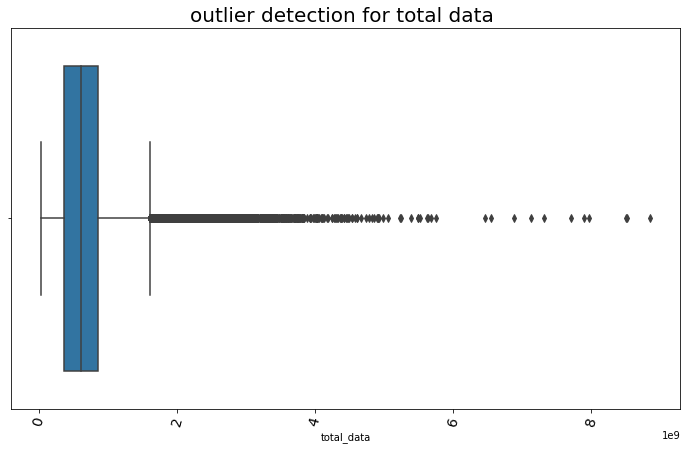

In [78]:
plots.plot_box(engagment_metrics, 'total_data', 'outlier detection for total data ')

In [84]:
def handle_outliers(df, col):
    df = df.copy()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    lower_bound = q1 - ((1.5) * (q3 - q1))
    upper_bound = q3 + ((1.5) * (q3 - q1))
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df



In [85]:

cleaned_engagment_metrics = handle_outliers(engagment_metrics, 'bearer_id')
cleaned_engagment_metrics = handle_outliers(cleaned_engagment_metrics, 'duration')
cleaned_engagment_metrics = handle_outliers(cleaned_engagment_metrics, 'total_data')
cleaned_engagment_metrics.describe()


,bearer_id,duration,total_data
count,105719.000000,105719.000000,105719.000000
mean,1.356634,130349.580378,662283010.076524
std,0.650007,87018.309018,394711651.731353
min,1.000000,7142.000000,33249009.000000
25%,1.000000,72729.000000,357950085.000000
50%,1.000000,103111.000000,616933544.000000
75%,2.000000,172799.000000,856473809.500000
max,3.500000,322904.000000,1604259396.250000


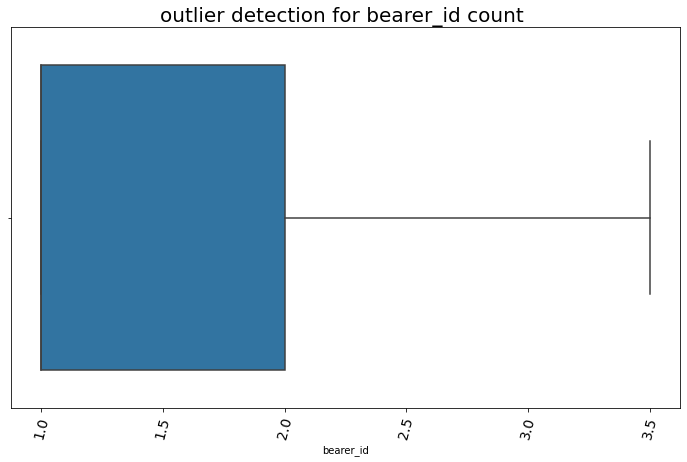

In [86]:
plots.plot_box(cleaned_engagment_metrics, 'bearer_id', 'outlier detection for bearer_id count ')


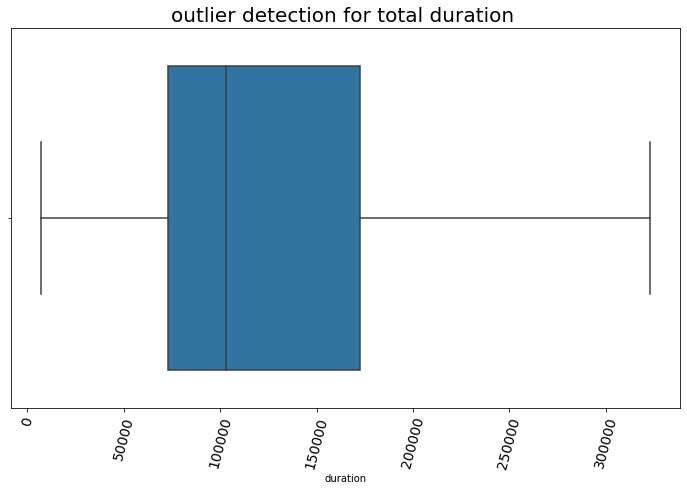

In [87]:
plots.plot_box(cleaned_engagment_metrics, 'duration', 'outlier detection for total duration ')


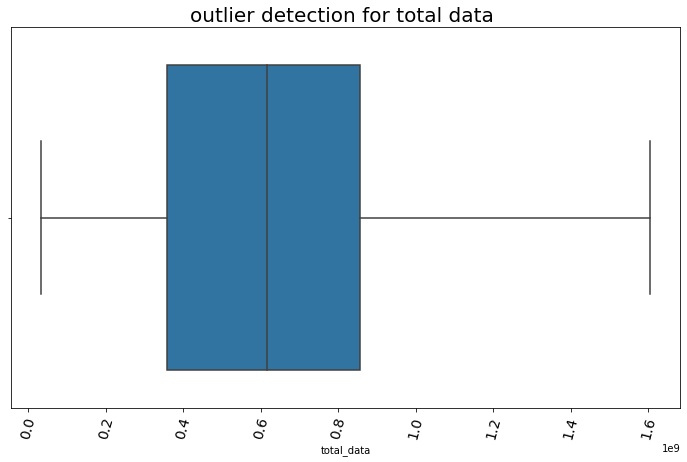

In [88]:
plots.plot_box(cleaned_engagment_metrics, 'total_data', 'outlier detection for total data ')


In [104]:
normalized_metrics = scale_and_normalize(cleaned_engagment_metrics, ['sessions_frequency', 'duration', 'total_traffic'])
normalized_metrics.describe()


,sessions_frequency,duration,total_traffic
count,105719.000000,105719.000000,105719.000000
mean,0.130161,0.615899,0.654168
std,0.221570,0.260170,0.242921
min,0.000000,0.000000,0.000000
25%,0.000000,0.447434,0.496042
50%,0.000000,0.637558,0.680414
75%,0.327139,0.830555,0.855126
max,0.963529,1.000000,1.000000


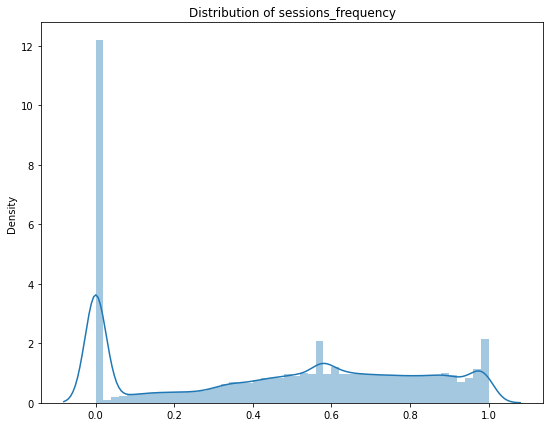

In [116]:
plots.plot_dist(normalized_metrics, 'sessions_frequency',)

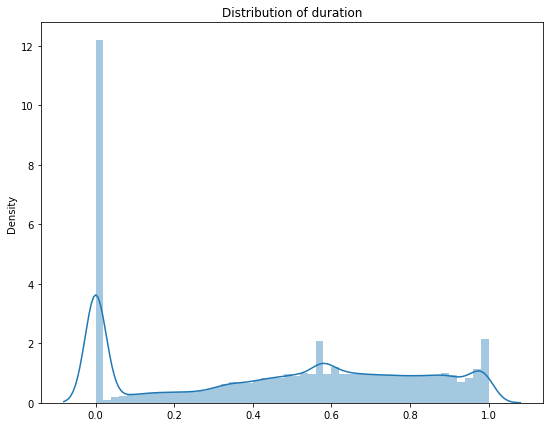

In [117]:
plots.plot_dist(normalized_metrics, 'duration',)

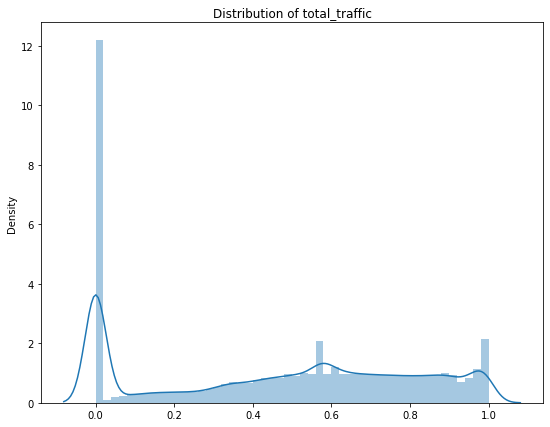

In [118]:
plots.plot_dist(normalized_metrics, 'total_traffic',)

In [174]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

engagment_metrics_with_cluster = cleaned_engagment_metrics.copy()
engagment_metrics_with_cluster['clusters'] = pred

In [175]:
def cluser_label(x: int, cols: list = []) -> str:
    if (type(x) != int):
        
    if (x < len(cols)):
        return cols[x]

    return str(x)
    

In [176]:

labels = ['cluser_1', 'cluser_2', 'cluser_3']

engagment_metrics_with_cluster['clusters']  = engagment_metrics_with_cluster['clusters'].map(lambda x:
                                                                                             cluser_label(x, labels))
engagment_metrics_with_cluster['clusters'].value_counts()


cluser_1    40265
cluser_2    39659
cluser_3    25795
Name: clusters, dtype: int64

In [182]:
engagment_metrics_with_cluster.groupby('duration').descibe().T

AttributeError: 'DataFrameGroupBy' object has no attribute 'descibe'